In [13]:
import numpy as np
import pandas as pd
import yfinance as yf
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [14]:

# Función para calcular el retorno diario
def calculate_daily_returns(data):
    return data.pct_change().dropna()

# Descargar los datos del IPC desde Yahoo Finance
ipc_data = yf.download('^MXX', start='2000-01-01', end='2024-03-15')

# Filtrar los datos de entrenamiento y prueba
train_data = ipc_data['2000-01-01':'2018-12-31']
test_data = ipc_data['2019-01-01':'2024-03-15']


[*********************100%%**********************]  1 of 1 completed


In [22]:
print(test_data.head())

                    Open          High           Low         Close  \
Date                                                                 
2019-01-02  41550.750000  42328.550781  41436.488281  42271.140625   
2019-01-03  42172.261719  42292.390625  41699.781250  42044.320312   
2019-01-04  42024.769531  42661.839844  42024.769531  42455.128906   
2019-01-07  42489.050781  42896.109375  42313.058594  42834.199219   
2019-01-08  43264.191406  43582.191406  43024.519531  43542.871094   

               Adj Close     Volume  
Date                                 
2019-01-02  42271.140625   68115200  
2019-01-03  42044.320312  113098700  
2019-01-04  42455.128906  110987200  
2019-01-07  42834.199219  142739600  
2019-01-08  43542.871094  174362500  


In [15]:

# Calcular los retornos diarios
train_returns = calculate_daily_returns(train_data['Close'])
test_returns = calculate_daily_returns(test_data['Close'])

# Escalar los datos
scaler = MinMaxScaler()
train_returns_scaled = scaler.fit_transform(train_returns.values.reshape(-1, 1))
test_returns_scaled = scaler.transform(test_returns.values.reshape(-1, 1))


In [16]:

# Crear secuencias de datos para la entrada del modelo
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)


In [17]:

seq_length = 60
X_train, y_train = create_sequences(train_returns_scaled, seq_length)
X_test, y_test = create_sequences(test_returns_scaled, seq_length)

# Reshape para la entrada del modelo
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Construir el modelo
model = Sequential()
model.add(GRU(100, activation='relu', input_shape=(seq_length, 1), return_sequences=True))
model.add(GRU(50, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

#model = Sequential()

#model.add(GRU(units=50,return_sequences = True, input_shape=(seq_length,1)))
#model.add(Dropout(0.2))
#model.add(GRU(units=50,return_sequences = True))
#model.add(Dropout(0.2))
#model.add(GRU(units=50))
#model.add(Dropout(0.1))
#model.add(Dense(units=1))

#model.compile(optimizer='adam', loss='mean_squared_error')

#history = model.fit(X_train,y_train,epochs=50,batch_size=32)



Epoch 1/50


c:\Users\Sergio Nava\anaconda3\envs\py311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


118/118 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.0266 - val_loss: 0.0021
Epoch 2/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0049 - val_loss: 0.0023
Epoch 3/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0055 - val_loss: 0.0023
Epoch 4/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0053 - val_loss: 0.0021
Epoch 5/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0055 - val_loss: 0.0021
Epoch 6/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0052 - val_loss: 0.0021
Epoch 7/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0059 - val_loss: 0.0021
Epoch 8/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0050 - val_loss: 0.0021
Epoch 9/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0050 - val_loss: 0.0028
Epoch 10/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0051 - val_loss: 0.0021
Epoch 11/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0050 - val_loss: 0.0020
Epoch 12/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/ste

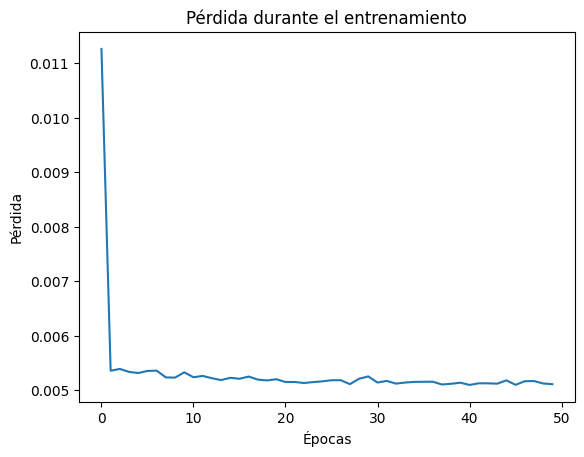

In [18]:
# Extrae la pérdida (loss) y la precisión (accuracy) de cada época
loss = history.history['loss']

# Importa la biblioteca matplotlib para crear la gráfica
import matplotlib.pyplot as plt

# Crea la gráfica de pérdida
plt.plot(loss)
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.show()

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


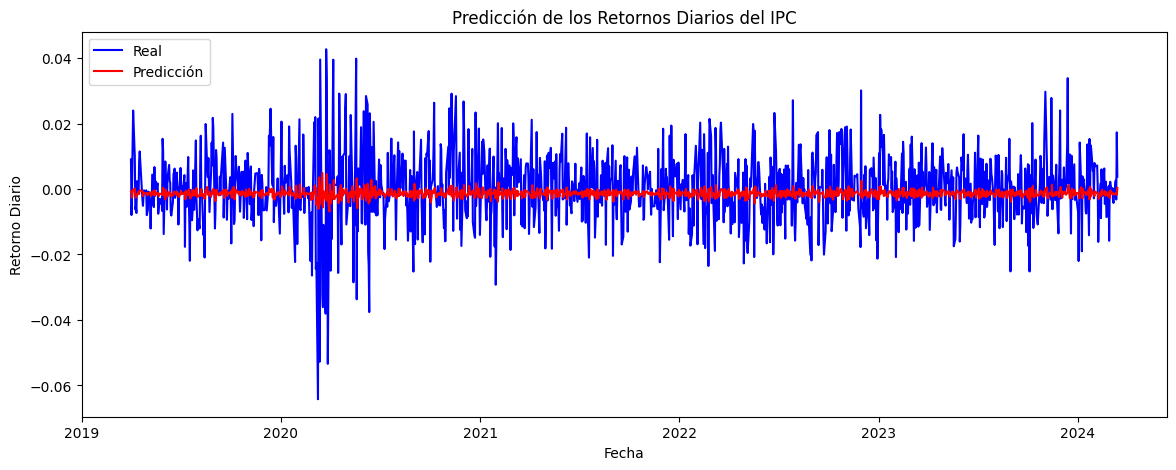

In [19]:

# Hacer predicciones
predictions = model.predict(X_test)

# Desescalar las predicciones
predictions_rescaled = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test)

# Mostrar los resultados
plt.figure(figsize=(14, 5))
plt.plot(test_returns.index[seq_length:], y_test_rescaled, color='blue', label='Real')
plt.plot(test_returns.index[seq_length:], predictions_rescaled, color='red', label='Predicción')
plt.title('Predicción de los Retornos Diarios del IPC')
plt.xlabel('Fecha')
plt.ylabel('Retorno Diario')
plt.legend()
plt.show()
